In [1]:
%matplotlib notebook

In [2]:
import h5py as h5
from stemutils.io import *
import hyperspy.api as hs

In [3]:
root = Path('/dls/i08/data/2022/mg32587-1/processing/')

In [4]:
root.walk()

[Path('/dls/i08/data/2022/mg32587-1/processing/68185c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68025_norm_full.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68025c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68162c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68138c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68068c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68049c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68138_norm_sum.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68112c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68025_norm_sum.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68138_norm_full.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68162_norm_sum.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68227c.nxs'),
 Path('/dls/i08/data/2022/mg32587-1/processing/68060_norm_full.hspy'),
 Path('/dls/i08/data/2022/mg32587-1/processing/I0_060.csv'),
 Path('/dls/i08/data/2022/mg

In [5]:
fp = root.walk('112c.nxs')[0]

In [6]:
with h5.File(fp) as f:
    #print(f['entry']['scan_shape'])
    fdata = f['entry1']['Counter1']['data'][()]
    pe = f['entry1']['Counter1']['photon_energy'][()]
    sample_x = f['entry1']['Counter1']['sample_x'][()]
    sample_y = f['entry1']['Counter1']['sample_y'][()]
    print(f['entry1']['Counter1'].keys())

<KeysViewHDF5 ['count_time', 'data', 'photon_energy', 'sample_x', 'sample_y', 'scan_type']>


/home/dto55534/.local/lib/python3.7/site-packages/ipykernel_launcher.py:1: H5pyDeprecationWarning: The default file mode will change to 'r' (read-only) in h5py 3.0. To suppress this warning, pass the mode you need to h5py.File(), or set the global default h5.get_config().default_file_mode, or set the environment variable H5PY_DEFAULT_READONLY=1. Available modes are: 'r', 'r+', 'w', 'w-'/'x', 'a'. See the docs for details.
  """Entry point for launching an IPython kernel.


In [7]:
pe

array([1070.003, 1070.999, 1072.001, 1072.999, 1074.   , 1075.001,
       1075.199, 1075.4  , 1075.6  , 1075.8  , 1075.998, 1076.203,
       1076.401, 1076.599, 1076.802, 1077.   , 1077.198, 1077.404,
       1077.6  , 1077.801, 1077.998, 1078.198, 1078.4  , 1078.599,
       1078.797, 1079.001, 1079.2  , 1079.397, 1079.601, 1079.796,
       1080.   , 1080.198, 1080.397, 1080.602, 1080.803, 1081.001,
       1081.202, 1081.401, 1081.601, 1081.802, 1082.002, 1082.202,
       1082.402, 1082.598, 1082.797, 1083.   , 1083.201, 1083.4  ,
       1083.599, 1083.802, 1083.998, 1084.2  , 1084.399, 1084.6  ,
       1084.802, 1084.999, 1085.203, 1085.401, 1085.603, 1085.799,
       1086.   , 1086.198, 1086.399, 1086.598, 1086.799, 1087.001,
       1087.199, 1087.4  , 1087.599, 1087.797, 1088.002, 1088.201,
       1088.398, 1088.599, 1088.801, 1089.   , 1089.2  , 1089.399,
       1089.599, 1089.8  , 1090.001, 1090.199, 1090.397, 1090.6  ,
       1090.797, 1090.996, 1091.5  , 1091.999, 1092.501, 1092.

In [8]:
cropx = 3
cropy = 2

In [9]:
fdata = fdata[:,cropx:, cropy:]

In [10]:
step_x = np.mean(np.diff(sample_x))
step_y = np.mean(np.diff(sample_y))

In [11]:
fdata.shape

(164, 37, 38)

In [12]:
sample_y.shape

(40,)

In [13]:
fsig = hs.signals.Signal2D(fdata)

/dls_sw/apps/python/anaconda/4.6.14/64/envs/epsic3.7/lib/python3.7/site-packages/pyUSID/viz/__init__.py:18: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  FutureWarning)


In [14]:
fdata.shape

(164, 37, 38)

In [15]:
th_data = []
thresh_val =0.7
for d in fdata:
    th_data.append(np.where(d< d.max()*thresh_val,1,0))

In [16]:
th_data = np.asarray(th_data)

In [17]:
th_data = th_data

In [18]:
tsig = hs.signals.Signal2D(np.asarray(th_data))

In [19]:
tsig

<Signal2D, title: , dimensions: (164|38, 37)>

In [20]:
from skimage import filters, feature

In [21]:
tdata = th_data[0]

In [22]:
roberts = filters.roberts(tdata.astype('float'))

In [23]:
bin_rob = np.where(roberts != 0, 1, 0)

In [24]:
import matplotlib.pyplot as plt

In [25]:
from scipy.ndimage.measurements import center_of_mass as com

In [26]:
all_rob = np.asarray([np.where(filters.roberts(tdata.astype('float')) != 0, 1,0) for tdata in th_data])
coms = np.asarray([com(rob) for rob in all_rob])

<IPython.core.display.Javascript object>


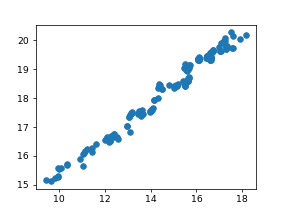

In [27]:
plt.figure()
plt.scatter(coms[:,0], coms[:,1])

In [28]:
all_rob_sig = hs.signals.Signal2D(all_rob)

<IPython.core.display.Javascript object>


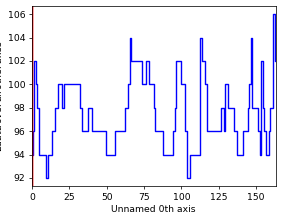

<IPython.core.display.Javascript object>


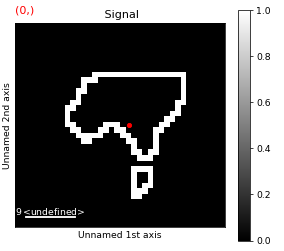

In [29]:
m = hs.plot.markers.point(x = coms[:,1], y = coms[:,0], color='red')
all_rob_sig.add_marker(m)

In [30]:
ffsig = hs.signals.Signal2D(fdata)

<IPython.core.display.Javascript object>


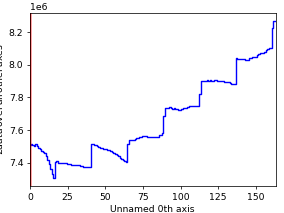

<IPython.core.display.Javascript object>


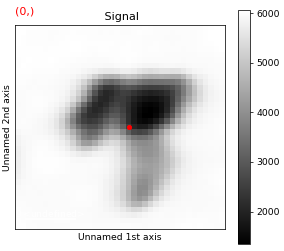

In [31]:
m3 = hs.plot.markers.point(x = coms[:,1], y = coms[:,0], color='red')
ffsig.add_marker(m3)

In [32]:
from scipy.ndimage import shift

In [33]:
reg_shift = coms - coms[0]

In [34]:
reg_data = []
for ind, shift_val in enumerate(reg_shift):
    reg_data.append(shift(fdata[ind], -shift_val))

In [35]:
reg_sig = hs.signals.Signal2D(reg_data)

<IPython.core.display.Javascript object>


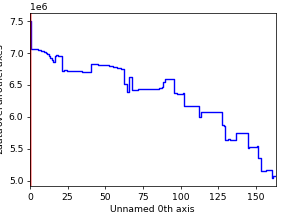

<IPython.core.display.Javascript object>


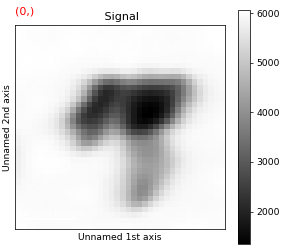

In [36]:
reg_sig.plot()

In [46]:
final_reg_sig = hs.signals.Signal2D(reg_sig.data[:,9:-3,6:-3])

In [47]:
final_reg_data = final_reg_sig.data

<IPython.core.display.Javascript object>


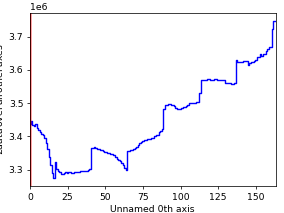

<IPython.core.display.Javascript object>


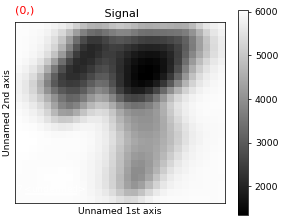

In [48]:
final_reg_sig.plot()

In [49]:
final_reg_data.shape

(164, 25, 29)

In [50]:
sigT_data = final_reg_data.transpose((1,2,0))

In [51]:
sigT_data.shape

(25, 29, 164)

In [52]:
dict0 = {'axis':pe, 'units': 'eV'}
dict1 = {'axis':np.arange(0, sigT_data.shape[0] * step_x, step_x), 'units': 'um'}
dict2 = {'axis':np.arange(0, sigT_data.shape[1]*step_y, step_y), 'units': 'um'}

In [53]:
dict0['axis'].shape

(164,)

In [54]:
dict2['axis'].shape

(29,)

In [55]:
dict1['axis'].shape

(26,)

In [56]:
sigT = hs.signals.Signal1D(sigT_data,axes = [dict2, dict1, dict0])

In [57]:
sigT2 = hs.signals.Signal1D(sigT_data)

<IPython.core.display.Javascript object>


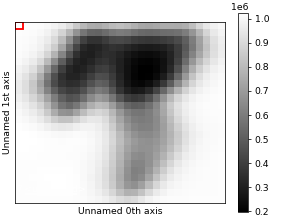

<IPython.core.display.Javascript object>


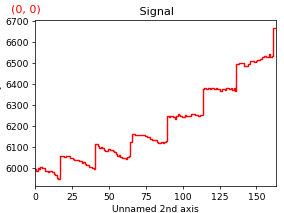

In [58]:
sigT2.plot()

In [59]:
sum_ints = np.sum(final_reg_data, axis = (0))

In [60]:
sum_ints.shape

(25, 29)

In [61]:
bkg_thresh = 0.75

In [62]:
bkg_mask = np.where(sum_ints>np.max(sum_ints)*bkg_thresh,1,0)
mask_loc = np.where(sum_ints>np.max(sum_ints)*bkg_thresh+0.2)

In [63]:
crystal_thresh = 0.65

In [64]:
crystal_mask = np.where(sum_ints>np.max(sum_ints)*crystal_thresh,0,1)

<IPython.core.display.Javascript object>


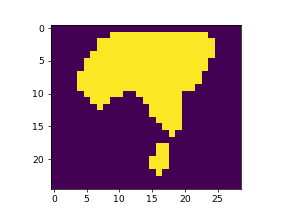

In [65]:
plt.figure()
plt.imshow(crystal_mask)

In [66]:
cryst_coords = np.asarray(np.where(crystal_mask == 1)).T

<IPython.core.display.Javascript object>


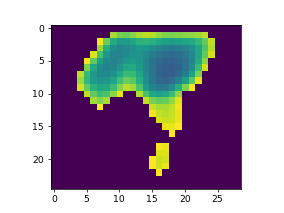

In [67]:
plt.figure()
plt.imshow(sigT2.data.sum(axis = (2)) * crystal_mask)

In [68]:
mask_coords = np.asarray(mask_loc).T

In [69]:
all_bkg = []
for mc in mask_coords:
    all_bkg.append(sigT.data[mc[0], mc[1],:])
all_bkg = np.asarray(all_bkg)

In [70]:
mean_bkg_profile = np.mean(all_bkg, axis = 0)

<IPython.core.display.Javascript object>


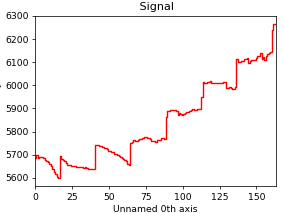

In [71]:
hs.signals.Signal1D(mean_bkg_profile).plot()

In [72]:
abs_sig = hs.signals.Signal1D(1-(sigT.data / mean_bkg_profile[None,None,:]))

<IPython.core.display.Javascript object>


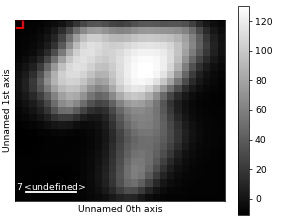

<IPython.core.display.Javascript object>


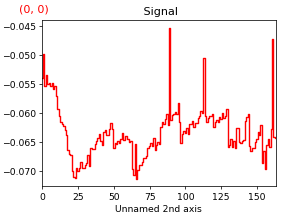

In [73]:
abs_sig.plot()

In [74]:
np.save(f"sample{fp.parts[-1].strip('c.nxs')[-3:]}_driftcorrected.npy", abs_sig.data)

In [75]:
np.save(f"energy_steps{fp.parts[-1].strip('c.nxs')[-3:]}.npy", pe)

In [76]:
sum_spec = hs.signals.Signal1D(1-(sigT.data / mean_bkg_profile[None,None,:]).sum(axis = (0,1)), axes = [dict0])

<IPython.core.display.Javascript object>


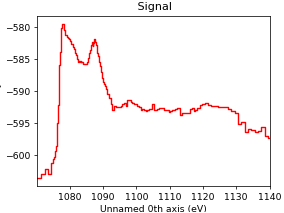

In [77]:
sum_spec.plot()

<IPython.core.display.Javascript object>


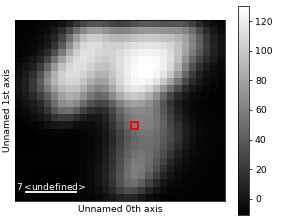

<IPython.core.display.Javascript object>


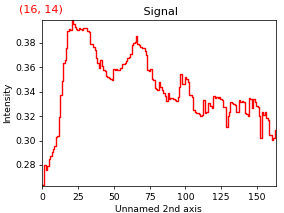

In [78]:
abs_sig.plot()

Decomposition info:
  normalize_poissonian_noise=False
  algorithm=NMF
  output_dimension=7
  centre=None
scikit-learn estimator:
NMF(n_components=7)


/home/dto55534/.local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/home/dto55534/.local/lib/python3.7/site-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


<IPython.core.display.Javascript object>


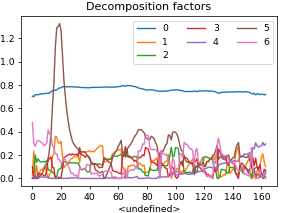

<IPython.core.display.Javascript object>


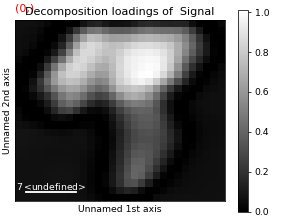

<IPython.core.display.Javascript object>


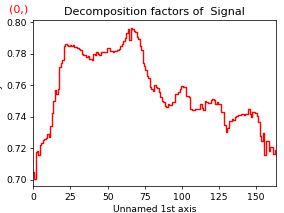

In [79]:
import pyxem as pxm

t_abs = pxm.signals.ElectronDiffraction1D(np.abs(abs_sig.data))

t_abs.decomposition(algorithm = 'NMF', output_dimension=7)

t_abs.plot_decomposition_factors()

t_abs.plot_decomposition_results()

In [80]:
from scipy import interpolate

In [81]:
def make_uniform(sig, non_uni_vals, n_uni_points):
    tot_x, tot_y = sig.data.shape[0], sig.data.shape[1]
    new_arr = np.zeros((tot_x, tot_y, n_uni_points))
    n_interp_x = np.linspace(non_uni_vals[0], non_uni_vals[-1], n_uni_points)
    for x_pos in range(tot_x):
        for y_pos in range(tot_y):
            t_interp_y = sig.data[x_pos,y_pos]
            interp_func = interpolate.splrep(non_uni_vals,t_interp_y, s=0)
            new_arr[x_pos, y_pos] = interpolate.splev(n_interp_x, interp_func)
    new_sig = hs.signals.Signal1D(new_arr)
    offset = n_interp_x[0]
    new_sig.axes_manager[2].offset= n_interp_x[0]
    new_sig.axes_manager[2].scale = (n_interp_x[-1] - offset)/n_uni_points
    return new_sig, n_interp_x

In [82]:
uni_abs, abs_energy_scale = make_uniform(abs_sig,pe, 200)

/home/dto55534/.local/lib/python3.7/site-packages/hyperspy/drawing/utils.py:159: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**kwargs)


<IPython.core.display.Javascript object>


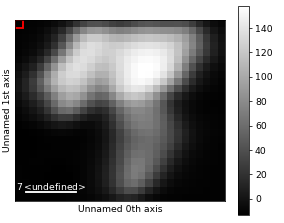

<IPython.core.display.Javascript object>


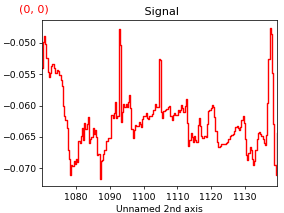

In [83]:
uni_abs.plot()

In [84]:
sum_spec.axes_manager[0]

<Unnamed 0th axis, size: 164>

In [85]:
sum_spec = hs.signals.Signal1D(0.6*(uni_abs.data.sum(axis = (0,1))/ (uni_abs.data.sum(axis = (0,1))).max()))
sum_spec.axes_manager[0].offset = uni_abs.axes_manager[2].offset
sum_spec.axes_manager[0].scale = uni_abs.axes_manager[2].scale

<IPython.core.display.Javascript object>


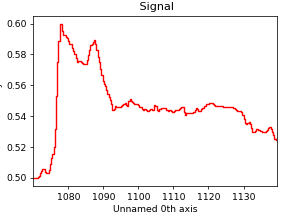

In [86]:
sum_spec.plot()

sum_spec = hs.signals.Signal1D(np.concatenate((np.random.randint(-100, -80, 50), np.random.randint(80, 100, 50)))+10)

In [87]:
m = sum_spec.create_model()

In [88]:
gaussian = hs.model.components1D.Gaussian(centre = 1078, sigma = 1.0)
gaussian2 = hs.model.components1D.Gaussian(centre = 1078, sigma = 1.0)
gaussian3 = hs.model.components1D.Gaussian(centre = 1080, sigma = 1.0)
gaussian4 = hs.model.components1D.Gaussian(centre = 1081.5, sigma = 1.0)
gaussian5 = hs.model.components1D.Gaussian(centre = 1083, sigma = 1.0)
gaussian6 = hs.model.components1D.Gaussian(centre = 1087, sigma = 1.0)

In [89]:
bgaussian = hs.model.components1D.Gaussian(centre = 1100, sigma = 1.0)
bgaussian2 = hs.model.components1D.Gaussian(centre = 1108, sigma = 1.0)
bgaussian3 = hs.model.components1D.Gaussian(centre = 1108, sigma = 1.0)
bgaussian4 = hs.model.components1D.Gaussian(centre = 1114, sigma = 1.0)
bgaussian5 = hs.model.components1D.Gaussian(centre = 1125, sigma = 1.0)

In [90]:
pre_peak = hs.model.components1D.Gaussian(centre = 1073, sigma = 1.0, A = 0.02)

pre_peak.centre.bmin = 1070.5
pre_peak.centre.bmax = 1074
pre_peak.A.bmin = 0
pre_peak.A.bmax = 0.02
pre_peak.sigma.bmin = 0
pre_peak.sigma.bmax = 2

In [91]:
pre_peak2 = hs.model.components1D.Gaussian(centre = 1073, sigma = 1.0, A = 0.02)

pre_peak2.centre.bmin = 1070.5
pre_peak2.centre.bmax = 1074
pre_peak2.A.bmin = 0
pre_peak2.A.bmax = 0.02
pre_peak2.sigma.bmin = 0
pre_peak2.sigma.bmax = 2

In [92]:
erf1 = hs.model.components1D.Erf(A = 0.1,origin = 1076, sigma = 0.05)
poly1 = hs.model.components1D.Polynomial(order=1, legacy=False)

In [93]:
poly1.a0.value = 0.51

In [94]:
poly1.a1.value = 0

In [95]:
poly1.a1.free = False

In [96]:
erf1.origin.bmin = 1075.0
erf1.origin.bmax = 1077.0

erf1.sigma.bmin = 0.01
erf1.sigma.bmax = 0.2

In [97]:
#erf1.origin.free = False
#erf1.sigma.free = False

In [98]:
m.extend((erf1, poly1,pre_peak, pre_peak2))

In [99]:
m.set_signal_range(1070., 1125.)

<IPython.core.display.Javascript object>


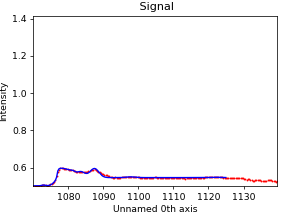

In [100]:
m.plot()

In [101]:
m.fit(bounded=True)

   covar: array([[ 6.37680343e-02, -2.86064722e-01,  0.00000000e+00,
        -2.47373390e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.86064722e-01,  7.49634808e+01,  0.00000000e+00,
         1.86302967e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [-2.47373390e-02,  1.86302967e-01,  0.00000000e+00,
         1.60024126e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
 

In [102]:
gs = (gaussian, gaussian2,gaussian3, gaussian4, gaussian5, gaussian6)

In [103]:
refine_dist = 0.5
for g in gs:
    cent = g.centre.value
    g.centre.bmin = cent - refine_dist
    g.centre.bmax = cent + refine_dist
    g.sigma.bmax = 1.25
    g.sigma.bmin = 0
    g.A.bmin = 0

In [104]:
m.extend(gs)

In [105]:
bkg_gs = (bgaussian, bgaussian2,bgaussian3, bgaussian4, bgaussian5)

In [106]:
b_refine_dist = 3
for g in bkg_gs:
    cent = g.centre.value
    g.centre.bmin = cent - b_refine_dist
    g.centre.bmax = cent + b_refine_dist
    g.sigma.bmax = 10
    g.sigma.bmin = 0
    g.A.value = 0.51
    g.A.bmin = 0
    g.A.bmax = 0.15

In [107]:
m.extend(bkg_gs)

In [108]:
m.fit(bounded = True, maxiter = 50)

   covar: array([[ 1.43627491e-01,  1.29994434e+00,  0.00000000e+00, ...,
        -1.35035494e-01,  0.00000000e+00, -1.83246840e+01],
       [ 1.29994434e+00,  2.67739863e+02,  0.00000000e+00, ...,
        -3.67141427e-02,  0.00000000e+00, -4.98220908e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-1.35035494e-01, -3.67141427e-02,  0.00000000e+00, ...,
         4.87264168e+00,  0.00000000e+00,  7.81805958e+02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.83246840e+01, -4.98220908e+00,  0.00000000e+00, ...,
         7.81805958e+02,  0.00000000e+00,  2.86762667e+05]])
     dof: 115
   fnorm: 0.0015981145001845594
 message: ''
    nfev: 2164
     nit: 50
  perror: array([3.78982178e-01, 1.63627584e+01, 0.00000000e+00, 1.92886656e-01,
       1.37742204e+00, 1.02984805e+02, 1.18264744e+02, 0.00000000

<IPython.core.display.Javascript object>


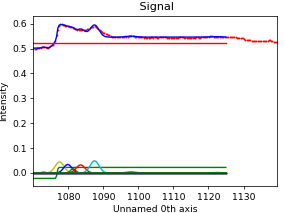

In [109]:
m.plot(plot_components=True)

In [110]:
def copy_gaussian(gauss_comp):
    mgaussian = hs.model.components1D.Gaussian(centre = 1073, sigma = 1.0)
    mgaussian.A.value = gauss_comp.A.value
    mgaussian.A.bmin = gauss_comp.A.bmin
    mgaussian.A.bmax = gauss_comp.A.bmax
    mgaussian.sigma.value = gauss_comp.sigma.value
    mgaussian.centre.value = gauss_comp.centre.value
    mgaussian.sigma.bmin = gauss_comp.sigma.bmin
    mgaussian.sigma.bmax = gauss_comp.sigma.bmax
    mgaussian.centre.bmin = gauss_comp.centre.bmin
    mgaussian.centre.bmax = gauss_comp.centre.bmax
    return mgaussian

def copy_poly(poly):
    poly1 = hs.model.components1D.Polynomial(order=1, legacy=False)
    poly1.a0.value = poly.a0.value
    poly1.a1.value = poly.a1.value
    poly1.a1.free = poly.a1.free
    poly1.a0.free = poly.a0.free
    return poly1

def copy_erf(erf):
    erf1 = hs.model.components1D.Erf(A = 0.1,origin = 1080, sigma = 0.1)
    erf1.origin.value = erf.origin.value
    erf1.A.value = erf.A.value
    erf1.A.free = erf.A.free
    erf1.sigma.value = erf.sigma.value
    erf1.origin.free = erf.origin.free
    erf1.sigma.free = erf.sigma.free
    erf1.origin.bmin = erf.origin.bmin
    erf1.origin.bmax = erf.origin.bmax
    erf1.sigma.bmin = erf.sigma.bmin
    erf1.sigma.bmax = erf.sigma.bmax
    return erf1

In [111]:
def fit_pixel_spec(x,y, stack_sig, comps):
    fit_sig = hs.signals.Signal1D(stack_sig.data[x,y])
    fit_sig.axes_manager[0].scale = stack_sig.axes_manager[2].scale
    fit_sig.axes_manager[0].offset = stack_sig.axes_manager[2].offset
    multi_m = fit_sig.create_model()
    mpre_peak = copy_gaussian(comps[0])
    mpre_peak2 = copy_gaussian(comps[1])
    mgaussian = copy_gaussian(comps[2])
    mgaussian2 = copy_gaussian(comps[3])
    mgaussian3 = copy_gaussian(comps[4])
    mgaussian4 = copy_gaussian(comps[5])
    mgaussian5 = copy_gaussian(comps[6])
    mgaussian6 = copy_gaussian(comps[7])
    mbgaussian = copy_gaussian(comps[8])
    mbgaussian2 = copy_gaussian(comps[9])
    mbgaussian3 = copy_gaussian(comps[10])
    mbgaussian4 = copy_gaussian(comps[11])
    mbgaussian5 = copy_gaussian(comps[12])
    merf1 = copy_erf(comps[13])
    mpoly1 = copy_poly(comps[14])
    
    multi_comps = [mpre_peak,
                   mpre_peak2,
                   mgaussian,
                  mgaussian2,
                  mgaussian3,
                  mgaussian4,
                  mgaussian5,
                  mgaussian6,
                  mbgaussian,
                  mbgaussian2,
                  mbgaussian3,
                  mbgaussian4,
                  mbgaussian5,
                  merf1,
                  mpoly1]

    
    multi_m.extend(multi_comps)
    multi_m.set_signal_range(1070, 1130)
    multi_m.fit(bounded = True, maxiter = 100)
    return multi_m

In [112]:
def fit_bkg_spec(x,y, stack_sig, comps):
    fit_sig = hs.signals.Signal1D(stack_sig.data[x,y])
    fit_sig = fit_sig.isig[:1130.0]
    fit_sig.axes_manager[0].scale = stack_sig.axes_manager[2].scale
    fit_sig.axes_manager[0].offset = stack_sig.axes_manager[2].offset
    multi_m = fit_sig.create_model()
    mgaussian = copy_gaussian(comps[0])
    mgaussian2 = copy_gaussian(comps[1])
    mgaussian3 = copy_gaussian(comps[2])
    mgaussian4 = copy_gaussian(comps[3])
    mgaussian5 = copy_gaussian(comps[4])
    mgaussian6 = copy_gaussian(comps[5])
    mbgaussian = copy_gaussian(comps[6])
    mbgaussian2 = copy_gaussian(comps[7])
    mbgaussian3 = copy_gaussian(comps[8])
    mbgaussian4 = copy_gaussian(comps[9])
    mbgaussian5 = copy_gaussian(comps[10])
    mbgaussian6 = copy_gaussian(comps[11])
    merf1 = copy_erf(comps[12])
    mpoly1 = copy_poly(comps[13])
    
    multi_comps = [mpre_peak,
                   mgaussian,
                  mgaussian2,
                  mgaussian3,
                  mgaussian4,
                  mgaussian5,
                  mgaussian6,
                  mbgaussian,
                  mbgaussian2,
                  mbgaussian3,
                  mbgaussian4,
                  mbgaussian5,
                  merf1,
                  mpoly1]
    
    
    multi_m.extend(multi_comps)
    multi_m.fit(maxfev = 500)
    
   
    return multi_m

In [113]:
comps = [pre_peak,
         pre_peak2,
         gaussian,
        gaussian2,
        gaussian3,
        gaussian4,
        gaussian5,
        gaussian6,
        bgaussian,
        bgaussian2,
        bgaussian3,
        bgaussian4,
        bgaussian5,
        erf1,
        poly1]

In [114]:
test_mfit = fit_pixel_spec(11,16,uni_abs,comps)

<IPython.core.display.Javascript object>


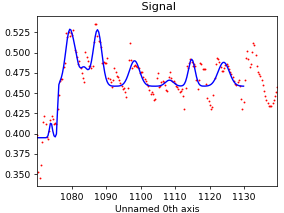

In [115]:
test_mfit.plot()

<IPython.core.display.Javascript object>


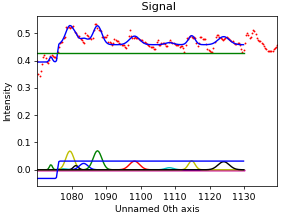

In [116]:
test_mfit.plot(plot_components = True)

<IPython.core.display.Javascript object>


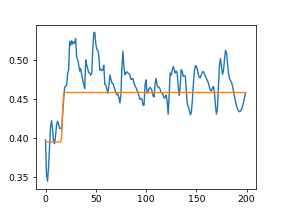

In [117]:
bkg_slope = test_mfit.components.Number_1st_order_Polynomial.function(abs_energy_scale) 

erf_fit = test_mfit.components.Erf.function(abs_energy_scale) 

bkg_fit = (erf_fit+bkg_slope)

plt.figure()
plt.plot(uni_abs.data[11,16])
plt.plot(bkg_fit)

In [118]:
bkg_grad = np.gradient(bkg_slope).mean()

In [119]:
bkg_slope = test_mfit.components.Number_1st_order_Polynomial.function(abs_energy_scale) 

erf_fit = test_mfit.components.Erf.function(abs_energy_scale) 

bkg_fit = erf_fit

<IPython.core.display.Javascript object>


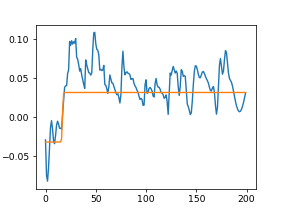

In [120]:
plt.figure()
plt.plot(uni_abs.data[11,16]-bkg_slope)
plt.plot(erf_fit)

In [121]:
bkg_fit.min(), bkg_fit.max()

(-0.03180834776495971, 0.03180834776495971)

In [122]:
norm_uni_abs = ((uni_abs.data[11,16]-bkg_slope) - bkg_fit.min())/ (bkg_fit.max()- bkg_fit.min())
norm_bkg = ((bkg_fit) - bkg_fit.min())/ (bkg_fit.max()- bkg_fit.min())

<IPython.core.display.Javascript object>


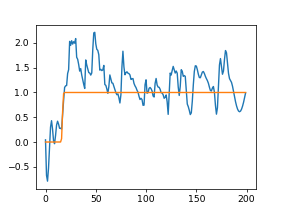

In [123]:
plt.figure()
plt.plot(norm_uni_abs)
plt.plot(norm_bkg)

fit_dict = {}

In [124]:
pat_coords = np.asarray(np.where(crystal_mask == 1)).T

In [125]:
pc = pat_coords[0]

In [126]:
import time

In [127]:
t1 = time.time()
fit_dict = {}
for pc in pat_coords:
    if tuple(fit_dict.keys()).count(pc[0]) ==0:
        fit_dict[pc[0]] = {}
    xfitdict = fit_dict[pc[0]]
    xfitdict[pc[1]] = fit_pixel_spec(pc[0],pc[1],uni_abs,comps)
t2 = time.time()

In [128]:
(t2-t1)/60

19.640229197343192

In [129]:
fit_dict

{1: {9: <Model1D>,
  10: <Model1D>,
  11: <Model1D>,
  12: <Model1D>,
  13: <Model1D>,
  14: <Model1D>,
  15: <Model1D>,
  16: <Model1D>,
  17: <Model1D>,
  18: <Model1D>,
  19: <Model1D>,
  20: <Model1D>,
  21: <Model1D>,
  22: <Model1D>,
  23: <Model1D>},
 2: {7: <Model1D>,
  8: <Model1D>,
  9: <Model1D>,
  10: <Model1D>,
  11: <Model1D>,
  12: <Model1D>,
  13: <Model1D>,
  14: <Model1D>,
  15: <Model1D>,
  16: <Model1D>,
  17: <Model1D>,
  18: <Model1D>,
  19: <Model1D>,
  20: <Model1D>,
  21: <Model1D>,
  22: <Model1D>,
  23: <Model1D>,
  24: <Model1D>},
 3: {7: <Model1D>,
  8: <Model1D>,
  9: <Model1D>,
  10: <Model1D>,
  11: <Model1D>,
  12: <Model1D>,
  13: <Model1D>,
  14: <Model1D>,
  15: <Model1D>,
  16: <Model1D>,
  17: <Model1D>,
  18: <Model1D>,
  19: <Model1D>,
  20: <Model1D>,
  21: <Model1D>,
  22: <Model1D>,
  23: <Model1D>,
  24: <Model1D>},
 4: {6: <Model1D>,
  7: <Model1D>,
  8: <Model1D>,
  9: <Model1D>,
  10: <Model1D>,
  11: <Model1D>,
  12: <Model1D>,
  13: <Mod

In [131]:
fit_dict[10][16].print_current_values(fancy=False)

Model1D: 
current_component_values: Gaussian
Active: True
Parameter Name |    Free |      Value |        Std |        Min |        Max | Linear
============== | ======= | ========== | ========== | ========== | ========== | ======
             A |    True |       0.02 |        0.0 |        0.0 |       0.02 |   True
        centre |    True |     1074.0 |        0.0 |     1070.5 |     1074.0 |  False
         sigma |    True | 0.37629673 | 0.29074601 |        0.0 |        2.0 |  False

current_component_values: Gaussian_0
Active: True
Parameter Name |    Free |      Value |        Std |        Min |        Max | Linear
============== | ======= | ========== | ========== | ========== | ========== | ======
             A |    True |        0.0 |        0.0 |        0.0 |       0.02 |   True
        centre |    True | 1070.50065 |        0.0 |     1070.5 |     1074.0 |  False
         sigma |    True | 1.16005929 |        0.0 |        0.0 |        2.0 |  False

current_component_values: Gaus

In [ ]:
fit_dict[10][26].plot(plot_components=True)

In [132]:
def find_usable_signals(uni_abs, abs_energy_scale, pat_coords, fit_dict, erf_thresh = 0.025):
    usable_mask = np.zeros(uni_abs.data.shape[:2])
    for pc in pat_coords:
        test_mfit = fit_dict[pc[0]][pc[1]]
        
        bkg_slope = test_mfit.components.Number_1st_order_Polynomial.function(abs_energy_scale) 

        erf = test_mfit.components.Erf
        
        if erf.A.value > erf_thresh:
            usable_mask[pc[0]][pc[1]] =1
    return usable_mask


def find_unusable_signals(uni_abs, abs_energy_scale, pat_coords, fit_dict, erf_thresh = 0.025):
    usable_mask = np.zeros(uni_abs.data.shape[:2])
    for pc in pat_coords:
        test_mfit = fit_dict[pc[0]][pc[1]]
        
        bkg_slope = test_mfit.components.Number_1st_order_Polynomial.function(abs_energy_scale) 

        erf = test_mfit.components.Erf
        
        if erf.A.value < erf_thresh:
            usable_mask[pc[0]][pc[1]] =1
    return usable_mask

In [133]:
def normalise(uni_abs, abs_energy_scale, pat_coords, fit_dict, erf_thresh= 0.025):
    norm_arr = np.zeros_like(uni_abs.data)
    
    usable_patterns =find_usable_signals(uni_abs, abs_energy_scale, pat_coords, fit_dict, erf_thresh)
    
    for pc in pat_coords:
        if usable_patterns[pc[0]][pc[1]] ==1:

            test_mfit = fit_dict[pc[0]][pc[1]]

            bkg_slope = test_mfit.components.Number_1st_order_Polynomial.function(abs_energy_scale) 

            erf_fit = test_mfit.components.Erf.function(abs_energy_scale) 

            bkg_fit = erf_fit

            if (bkg_fit.max()- bkg_fit.min()) < 0.01:
                spec = uni_abs.data[pc[0],pc[1]]
                spec_sig = test_mfit.signal
                pre_edge = spec_sig.isig[:1076.]
                post_edge = spec_sig.isig[1076.0:1100.]

                norm_min = pre_edge.data.min()
                norm_max = post_edge.data.max()


                norm_arr[pc[0]][pc[1]] = (spec - norm_min)/np.abs(norm_max- norm_min)
            else:

                norm_arr[pc[0]][pc[1]] = ((uni_abs.data[pc[0],pc[1]]-bkg_slope) - bkg_fit.min())/ (bkg_fit.max()- bkg_fit.min())

    norm_sig = hs.signals.Signal1D(norm_arr)
    norm_sig.axes_manager[2].scale = uni_abs.axes_manager[2].scale
    norm_sig.axes_manager[2].offset = uni_abs.axes_manager[2].offset
    return norm_sig

In [141]:
usable_patterns =find_usable_signals(uni_abs, abs_energy_scale, pat_coords, fit_dict)
unusable_patterns =find_unusable_signals(uni_abs, abs_energy_scale, pat_coords, fit_dict)
usable_coords = np.asarray(np.where(usable_patterns ==1)).T
unusable_coords = np.asarray(np.where(unusable_patterns ==1)).T

In [142]:
norm_uni_abs = normalise(uni_abs, abs_energy_scale, usable_coords, fit_dict, 0.02)

<IPython.core.display.Javascript object>


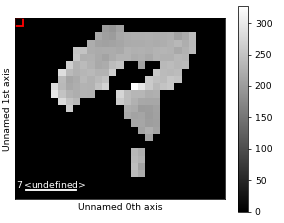

<IPython.core.display.Javascript object>


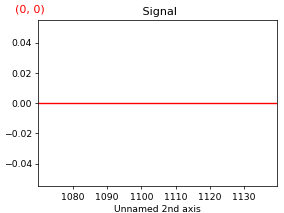

In [143]:
norm_uni_abs.plot()

<IPython.core.display.Javascript object>


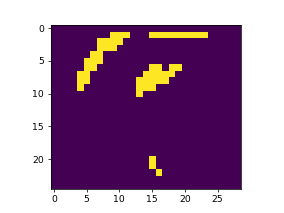

In [144]:
plt.figure()
plt.imshow(unusable_patterns)

<IPython.core.display.Javascript object>


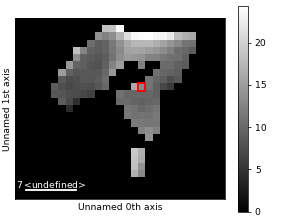

<IPython.core.display.Javascript object>


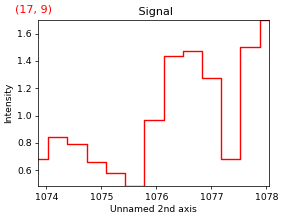

In [145]:
norm_uni_abs.isig[1074.:1078.5].plot()

In [146]:
er = (1074.0,1078.5)

In [147]:
def locate_inflection(norm_uni_abs, energy_range, abs_energy_scale, pos, interp_upscale = 1000, vis = False):
    #locate the nearest energy values to the window bounds specified
    er_lower = abs_energy_scale[np.argmin(np.abs(abs_energy_scale - energy_range[0]))]
    er_upper = abs_energy_scale[np.argmin(np.abs(abs_energy_scale - energy_range[1]))]
    
    er = (er_lower, er_upper)
    
    #crop the signal to the specified window
    
    norm_edge_raw = norm_uni_abs.isig[er_lower:er_upper]
    
    x,y = pos
    
    #find the pixel of interest

    test_edge_raw = norm_edge_raw.data[x,y]
    
    #upsample the signal to give better precision of inflection location

    test_edge_spl = interpolate.splrep(np.arange(len(test_edge_raw)), test_edge_raw, s = 0)
    test_edge_interp_raw = interpolate.splev(np.linspace(0, len(test_edge_raw), interp_upscale), test_edge_spl)
    
    #make sure we are only searching in the pre edge region
    
    try:
    
        test_edge_interp = test_edge_interp_raw[:np.argmax(test_edge_interp_raw)+1]

        if vis == True:
            plt.figure()
            plt.scatter(np.linspace(0, len(test_edge_raw), interp_upscale)[:np.argmax(test_edge_interp_raw)+1], test_edge_interp)

        #get second derivative

        deriv1 = np.gradient(test_edge_interp)
        deriv2 = np.gradient(deriv1)
    
        #get the minimum location

        minarg = np.argmin(test_edge_interp)

        #print(minarg)

        inflection_window = test_edge_interp[minarg:]

        inflection_deriv1 = deriv1[minarg:]
        inflection_deriv2 = deriv2[minarg:]

        infl_args = np.where(np.diff(np.sign(inflection_deriv2)))[0]

        best_infl = infl_args[np.argmax(inflection_deriv1[infl_args])]

        if vis ==True:
            plt.figure()
            plt.plot(inflection_window)
            for infl_arg in infl_args:
                plt.axvline(infl_arg)
            plt.axvline(best_infl, c='red')

        #print(infl_args)

        infl_energy = np.linspace(0, len(test_edge_raw), interp_upscale)[minarg] +np.diff(np.linspace(0, len(test_edge_raw), interp_upscale))[0] * best_infl

        infl_e_scaled = ((er[1]-er[0])*(infl_energy/norm_edge_raw.data.shape[2])) + er[0]

        #print(infl_energy)

        return infl_e_scaled
    except:
        return 0

In [148]:
def locate_8020_point(norm_uni_abs, energy_range, pos, interp_upscale = 1000):
    er = energy_range

    norm_edge_raw = norm_uni_abs.isig[er[0]:er[1]]
    
    x,y = pos


    test_edge_raw = norm_edge_raw.data[x,y]

    test_edge_spl = interpolate.splrep(np.arange(len(test_edge_raw)), test_edge_raw, s = 0)
    test_edge_interp = interpolate.splev(np.linspace(0, len(test_edge_raw), interp_upscale), test_edge_spl)


    minmax = np.sort((np.argmax(test_edge_interp), np.argmin(test_edge_interp)))
    
    maxval20 = np.max(test_edge_interp)*0.2
    maxval80 = np.max(test_edge_interp)*0.8 

    inflection_box = test_edge_interp[minmax[0]:minmax[1]+1]

    infl_arg20 = np.argmin(np.abs(inflection_box - maxval20))

    infl_energy20 = np.linspace(0, len(test_edge_raw), interp_upscale)[minmax[0]] +np.diff(np.linspace(0, len(test_edge_raw), interp_upscale))[0] * infl_arg20

    infl_energy_scaled20 = ((er[1]-er[0])*(infl_energy20/norm_edge_raw.data.shape[2])) + er[0]
    
    infl_arg80 = np.argmin(np.abs(inflection_box - maxval80))

    infl_energy80 = np.linspace(0, len(test_edge_raw), interp_upscale)[minmax[0]] +np.diff(np.linspace(0, len(test_edge_raw), interp_upscale))[0] * infl_arg80

    infl_energy_scaled80 = ((er[1]-er[0])*(infl_energy80/norm_edge_raw.data.shape[2])) + er[0]
    
    return np.mean((infl_energy_scaled20, infl_energy_scaled80))


def locate_halfmax_point(norm_uni_abs, energy_range, pos, interp_upscale = 1000):
    try:
        er = energy_range

        norm_edge_raw = norm_uni_abs.isig[er[0]:er[1]]

        x,y = pos


        test_edge_raw = norm_edge_raw.data[x,y]


        test_edge_spl = interpolate.splrep(np.arange(len(test_edge_raw)), test_edge_raw, s = 0)
        test_edge_interp = interpolate.splev(np.linspace(0, len(test_edge_raw), interp_upscale), test_edge_spl)

        test_edge_interp_crop = test_edge_interp[:np.argmax(test_edge_interp)+1]

        minmax = np.sort((np.argmax(test_edge_interp_crop), np.argmin(test_edge_interp_crop)))

        halfmaxval = np.max(test_edge_interp)*0.5

        inflection_box = test_edge_interp[minmax[0]:minmax[1]]

        infl_arg = np.argmin(np.abs(inflection_box - halfmaxval))

        infl_energy = np.linspace(0, len(test_edge_raw), interp_upscale)[minmax[0]] +np.diff(np.linspace(0, len(test_edge_raw), interp_upscale))[0] * infl_arg

        infl_energy_scaled = ((er[1]-er[0])*(infl_energy/norm_edge_raw.data.shape[2])) + er[0]

        return infl_energy_scaled
    except:
        return 0

In [151]:
test_loc = (10,16)

<IPython.core.display.Javascript object>


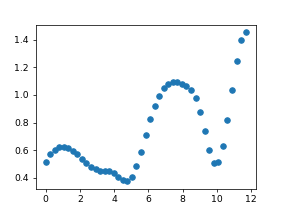

<IPython.core.display.Javascript object>


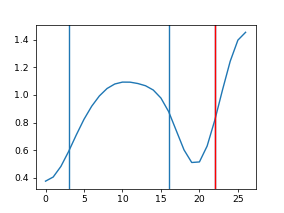

In [152]:
infl_energy = locate_inflection(norm_uni_abs, er, abs_energy_scale, test_loc, interp_upscale=50, vis = True)

In [153]:
infl_energy

1077.60497138755

In [154]:
energy8020 = locate_8020_point(norm_uni_abs, er, test_loc, interp_upscale=100)

In [155]:
energy_halfmax = locate_halfmax_point(norm_uni_abs, er, test_loc, interp_upscale=100)

<IPython.core.display.Javascript object>


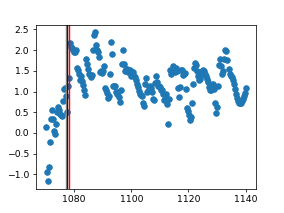

In [156]:
plt.figure()
plt.scatter(abs_energy_scale,norm_uni_abs.data[test_loc[0], test_loc[1]])
plt.axvline(infl_energy, c ='black')
plt.axvline(energy8020, c ='red')
plt.axvline(energy_halfmax, c ='grey')

In [157]:
infl_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    infl_arr[pc[0],pc[1]] = locate_inflection(norm_uni_abs, er, abs_energy_scale,pc, interp_upscale=200)

<IPython.core.display.Javascript object>


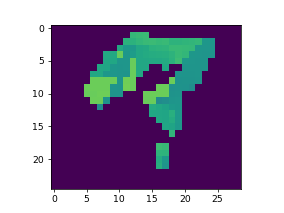

In [158]:
plt.figure()
plt.imshow(infl_arr, vmin = 1073, vmax = 1079)

In [159]:
infl_mean = np.mean(infl_arr[np.where(infl_arr!=0)])
mean_adj_infl =infl_arr- infl_mean
mean_adj_infl = np.where(mean_adj_infl < -20, 0, mean_adj_infl)

<IPython.core.display.Javascript object>


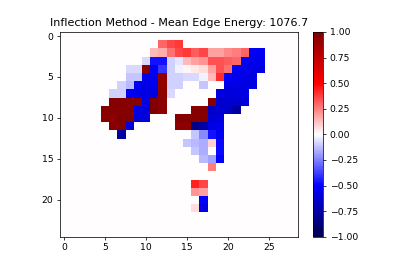

Text(0.5, 1.0, 'Inflection Method - Mean Edge Energy: 1076.7')

In [160]:
plt.figure(figsize = (9,6))
plt.imshow(mean_adj_infl, cmap = 'seismic', vmin = -1, vmax = 1)
plt.colorbar()
plt.title(f'Inflection Method - Mean Edge Energy: {np.round(infl_mean,2)}')

<IPython.core.display.Javascript object>


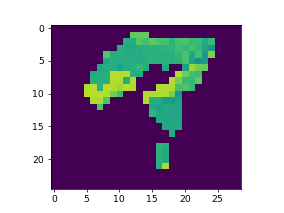

In [161]:
eighttwenty_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    eighttwenty_arr[pc[0],pc[1]] = locate_8020_point(norm_uni_abs, er, pc, interp_upscale=100)

plt.figure()
plt.imshow(eighttwenty_arr, vmin = 1073, vmax = 1079)

<IPython.core.display.Javascript object>


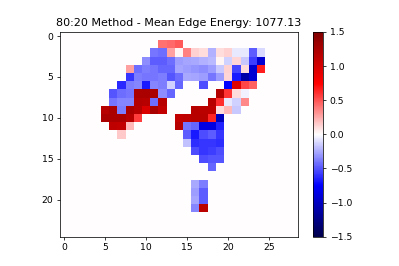

Text(0.5, 1.0, '80:20 Method - Mean Edge Energy: 1077.13')

In [162]:
eighttwenty_mean = np.mean(eighttwenty_arr[np.where(usable_patterns==1)])
mean_adj_eighttwenty =eighttwenty_arr- eighttwenty_mean
mean_adj_eighttwenty = np.where(mean_adj_eighttwenty < -20, 0, mean_adj_eighttwenty)

plt.figure(figsize = (9,6))
plt.imshow(mean_adj_eighttwenty, cmap = 'seismic', vmin = -1.5, vmax = 1.5)
plt.colorbar()
plt.title(f'80:20 Method - Mean Edge Energy: {np.round(eighttwenty_mean,2)}')

<IPython.core.display.Javascript object>


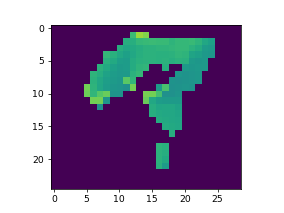

In [163]:
halfmax_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    halfmax_arr[pc[0],pc[1]] = locate_halfmax_point(norm_uni_abs, er, pc, interp_upscale=100)

plt.figure()
plt.imshow(halfmax_arr, vmin = 1073, vmax = 1079)

<IPython.core.display.Javascript object>


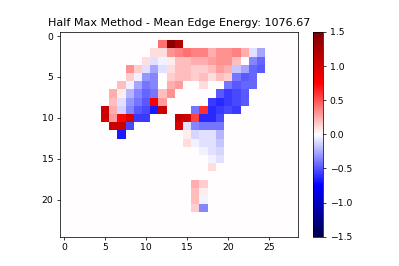

Text(0.5, 1.0, 'Half Max Method - Mean Edge Energy: 1076.67')

In [164]:
halfmax_mean = np.mean(halfmax_arr[np.where(halfmax_arr != 0)])
mean_adj_halfmax =halfmax_arr- halfmax_mean
mean_adj_halfmax = np.where(mean_adj_halfmax < -20, 0, mean_adj_halfmax)

plt.figure(figsize = (9,6))
plt.imshow(mean_adj_halfmax, cmap = 'seismic', vmin = -1.5, vmax = 1.5)
plt.colorbar()
plt.title(f'Half Max Method - Mean Edge Energy: {np.round(halfmax_mean,2)}')

In [165]:
norm_sum_spec = hs.signals.Signal1D(norm_uni_abs.data[np.where(norm_uni_abs.sum(axis = 2) != 0)].mean(axis = 0))

In [166]:
norm_sum_spec.axes_manager[0].offset = uni_abs.axes_manager[2].offset
norm_sum_spec.axes_manager[0].scale = uni_abs.axes_manager[2].scale

<IPython.core.display.Javascript object>


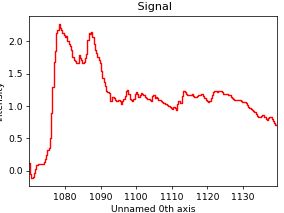

In [167]:
norm_sum_spec.plot()

In [168]:
m_norm = norm_sum_spec.create_model()

In [169]:
norm_uni_abs.save(fp.redirect(fp.parts[-1].strip('c.nxs') + '_norm_full.hspy', 1))
norm_sum_spec.save(fp.redirect(fp.parts[-1].strip('c.nxs') + '_norm_sum.hspy', 1))

In [170]:
pV1 = hs.model.components1D.Gaussian()
pV2 = hs.model.components1D.Gaussian()
pV3 = hs.model.components1D.Gaussian()
pV4 = hs.model.components1D.Gaussian()
pV5 = hs.model.components1D.Gaussian()

In [171]:
pVoights = [pV1,pV2,pV3,pV4,pV5]

In [172]:
centresV = [1078, 1080, 1084, 1084, 1088]
for indV, pV in enumerate(pVoights):
    pV.centre.value = centresV[indV]
    pV.centre.bmin = pV.centre.value -2 
    pV.centre.bmax = pV.centre.value +2 
    pV.sigma.bmax = 1.5

In [173]:
norm_erf1 = hs.model.components1D.Erf(A = 1.0,origin = 1076, sigma = 0.0001)
norm_poly1 = hs.model.components1D.Polynomial(order=1, legacy=False)

norm_poly1.a0.value = 0.5

norm_poly1.a1.value = 0

norm_poly1.a1.free = False
norm_poly1.a0.free = False

In [174]:
norm_erf1.origin.free = False
norm_erf1.sigma.free = False
norm_erf1.A.free = False

In [175]:
#erf1.origin.free = False
#erf1.sigma.free = False

In [176]:
m_norm.extend((norm_erf1, norm_poly1))

m.set_signal_range(1070., 1075.)

<IPython.core.display.Javascript object>


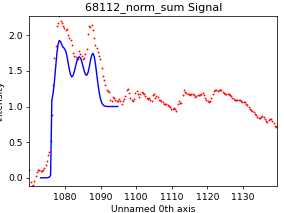

In [177]:
m_norm.plot()

In [178]:
m_norm.set_signal_range(1073, 1095)

In [179]:
m_norm.extend(pVoights)

In [180]:
m_norm.fit(bounded=True)

   covar: array([[ 2.82520898e+02,  1.06108395e+02,  4.30865878e+01,
        -4.18744774e+02,  1.02425086e+02, -1.44979644e+02,
         9.91887325e+07, -1.99694089e+10,  0.00000000e+00,
        -9.91886508e+07,  1.99694085e+10,  1.03124056e+02,
         6.09916428e+01, -2.54457848e+01,  1.06615193e+01],
       [ 1.06108395e+02,  4.08145208e+01,  1.63469142e+01,
        -1.55835842e+02,  3.97989657e+01, -5.37036184e+01,
         3.53677977e+07, -7.15070544e+09,  0.00000000e+00,
        -3.53677679e+07,  7.15070530e+09,  3.75671995e+01,
         2.16995635e+01, -9.04297326e+00,  3.77680720e+00],
       [ 4.30865878e+01,  1.63469142e+01,  7.50838862e+00,
        -6.02471749e+01,  1.69566554e+01, -2.02803433e+01,
         1.18686561e+07, -2.50700581e+09,  0.00000000e+00,
        -1.18686453e+07,  2.50700576e+09,  1.35227069e+01,
         7.53804423e+00, -3.13750329e+00,  1.30834891e+00],
       [-4.18744774e+02, -1.55835842e+02, -6.02471749e+01,
         6.73981510e+02, -1.29248771e+02,  

<IPython.core.display.Javascript object>


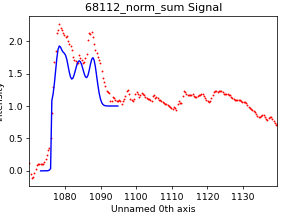

In [181]:
m_norm.plot()

In [182]:
def copy_voight(oV):
    nV = hs.model.components1D.PESVoigt()
    nV.centre.value = oV.centre.value
    nV.centre.bmin = oV.centre.bmin
    nV.centre.bmax = oV.centre.bmax
    nV.area.value = oV.area.value
    nV.area.bmin = oV.area.bmin
    nV.area.bmax = oV.area.bmax
    nV.FWHM.value = oV.FWHM.value
    nV.FWHM.bmin = oV.FWHM.bmin
    nV.FWHM.bmax = oV.FWHM.bmax
    nV.gamma.value = oV.gamma.value
    nV.gamma.bmin = oV.gamma.bmin
    nV.gamma.bmax = oV.gamma.bmax
    nV.shirley_background.value = oV.shirley_background.value
    nV.resolution.value = oV.resolution.value
    nV.non_isochromaticity.value = oV.non_isochromaticity.value
    nV.transmission_function.value = oV.transmission_function.value
    return nV

In [183]:
def fit_norm_spec(x,y, stack_sig, comps, sr):
    fit_sig = hs.signals.Signal1D(stack_sig.data[x,y])
    fit_sig.axes_manager[0].scale = stack_sig.axes_manager[2].scale
    fit_sig.axes_manager[0].offset = stack_sig.axes_manager[2].offset
    norm_multi_m = fit_sig.create_model()
    v1 = copy_gaussian(comps[0])
    v2 = copy_gaussian(comps[1])
    v3 = copy_gaussian(comps[2])
    v4 = copy_gaussian(comps[3])
    v5 = copy_gaussian(comps[4])
    erf1 = copy_erf(comps[5])
    poly1 = copy_poly(comps[6])
    
    v3.centre.value = 1083
    
    
    multi_comps = [v1,
                   v2,
                   v3,
                   v4,
                   v5,
                   erf1,
                   poly1]
                   

    
    norm_multi_m.extend(multi_comps)
    norm_multi_m.set_signal_range(sr[0], sr[1])
    norm_multi_m.fit(bounded = True,maxiter = 100)
    
    #v1.area.value = 10
    return norm_multi_m

In [192]:
norm_comps = [pV1, pV2, pV3, pV4, pV5, norm_erf1, norm_poly1]

In [193]:
signal_range = (1076, 1092)

<IPython.core.display.Javascript object>


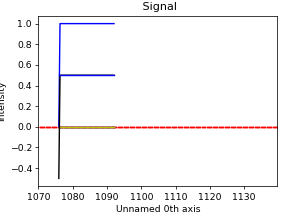

In [194]:
fit_norm_spec(15,15, norm_uni_abs,norm_comps, signal_range).plot(plot_components= True)

<IPython.core.display.Javascript object>


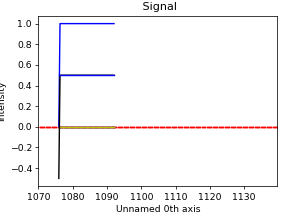

In [195]:
fit_norm_spec(10,10, norm_uni_abs,norm_comps, signal_range).plot(plot_components= True)

In [196]:
t1 = time.time()
norm_fit_dict = {}
for pc in usable_coords:
    if tuple(norm_fit_dict.keys()).count(pc[0]) ==0:
        norm_fit_dict[pc[0]] = {}
    xfitdict = norm_fit_dict[pc[0]]
    xfitdict[pc[1]] = fit_norm_spec(pc[0],pc[1],norm_uni_abs,norm_comps, signal_range)
t2 = time.time()

In [197]:
t2 - t1

179.57615208625793

<IPython.core.display.Javascript object>


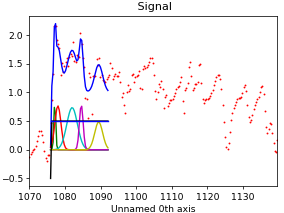

In [199]:
norm_fit_dict[10][26].plot(plot_components=True)

In [200]:
def sum_edge(x,y, model_fits, edge_range, full_energy_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(full_energy_range[0], full_energy_range[1], sampling)
    gaussians = [model.components.Gaussian,
                 model.components.Gaussian_0,
               model.components.Gaussian_1,
               model.components.Gaussian_2,
               model.components.Gaussian_3]
    edge_gaussian_area = np.array([gauss.function(energy_sampling) for gauss in gaussians if np.searchsorted(edge_range, gauss.centre.value)%2 == 1])
        
    return np.trapz(edge_gaussian_area.sum(axis = 0))

second_peak_range = (1085, 1090)

pre_edge_range = (1070, 1073)
post_edge_range = (1100, 1140)
edge_range = (1075, 1080)
full_energy_range = (pe[0], pe[-1])

def pop_dict_with_result(dic, pat_coords, func, *args):
    for pc in pat_coords:
        if tuple(dic.keys()).count(pc[0]) ==0:
            dic[pc[0]] = {}
        xdic = dic[pc[0]]
        xdic[pc[1]] = func(pc[0],pc[1],*args)
    return dic

def sum_pre_edge(x,y, model_fits, pre_edge_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(pre_edge_range[0], pre_edge_range[1], sampling)
    erf_comp = model.components.Erf.function(energy_sampling)
    linear_comp = model.components.Number_1st_order_Polynomial.function(energy_sampling)
    return np.trapz(erf_comp+linear_comp)

def sum_post_edge(x,y, model_fits, post_edge_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(post_edge_range[0], post_edge_range[1], sampling)
    erf_comp = model.components.Erf.function(energy_sampling)
    linear_comp = model.components.Number_1st_order_Polynomial.function(energy_sampling)
    return np.trapz(erf_comp+linear_comp)


def extract_central_positions(x,y, model_fits):
    model = model_fits[x][y]
    gaussians = [model.components.Gaussian_1,
               model.components.Gaussian_2,
               model.components.Gaussian_3,
               model.components.Gaussian_4,
               model.components.Gaussian_5]
    centres = np.sort([gauss.centre.value for gauss in gaussians])
        
    return centres

In [201]:
second_peak_range = (1085, 1090)

In [202]:
edge_range

(1075, 1080)

In [203]:
norm_edge_sums = {}
norm_edge_sums =pop_dict_with_result(norm_edge_sums, usable_coords, 
                                     sum_edge, norm_fit_dict,edge_range, full_energy_range, 100)

In [204]:
norm_2edge_sums = {}
norm_2edge_sums =pop_dict_with_result(norm_2edge_sums, usable_coords, 
                                      sum_edge, norm_fit_dict,second_peak_range, full_energy_range, 100)

<IPython.core.display.Javascript object>


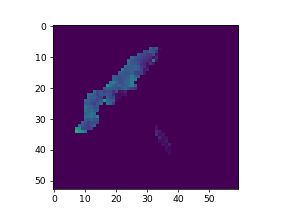

In [205]:
norm_edge_sum_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    norm_edge_sum_arr[pc[0],pc[1]] = norm_edge_sums[pc[0]][pc[1]]

plt.figure()
plt.imshow(norm_edge_sum_arr, vmax = 12)

<IPython.core.display.Javascript object>


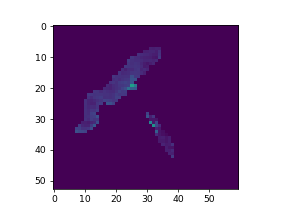

In [206]:
norm_2edge_sum_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    norm_2edge_sum_arr[pc[0],pc[1]] = norm_2edge_sums[pc[0]][pc[1]]

plt.figure()
plt.imshow(norm_2edge_sum_arr, vmax = 15)

<IPython.core.display.Javascript object>


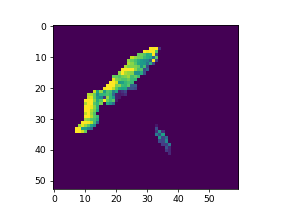

In [207]:
peak_ratio_arr = np.zeros_like(crystal_mask, dtype = 'float')

for pc in usable_coords:
    ratio = norm_edge_sums[pc[0]][pc[1]]/norm_2edge_sums[pc[0]][pc[1]]
    if norm_2edge_sums[pc[0]][pc[1]] != 0:
        peak_ratio_arr[pc[0],pc[1]] = ratio
    else:
        peak_ratio_arr[pc[0],pc[1]] = 0

plt.figure()
plt.imshow(peak_ratio_arr, vmax = 2)

<IPython.core.display.Javascript object>


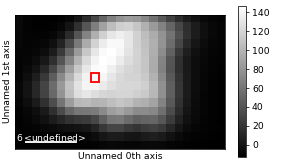

<IPython.core.display.Javascript object>


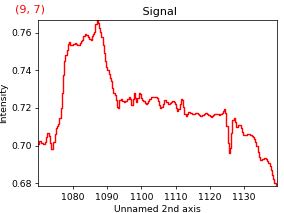

In [210]:
uni_abs.plot()

In [ ]:
def pop_dict_with_result(dic, pat_coords, func, *args):
    for pc in pat_coords:
        if tuple(dic.keys()).count(pc[0]) ==0:
            dic[pc[0]] = {}
        xdic = dic[pc[0]]
        xdic[pc[1]] = func(pc[0],pc[1],*args)
    return dic

In [ ]:
def sum_pre_edge(x,y, model_fits, pre_edge_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(pre_edge_range[0], pre_edge_range[1], sampling)
    erf_comp = model.components.Erf.function(energy_sampling)
    linear_comp = model.components.Number_1st_order_Polynomial.function(energy_sampling)
    return np.trapz(erf_comp+linear_comp)

def sum_post_edge(x,y, model_fits, post_edge_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(post_edge_range[0], post_edge_range[1], sampling)
    erf_comp = model.components.Erf.function(energy_sampling)
    linear_comp = model.components.Number_1st_order_Polynomial.function(energy_sampling)
    return np.trapz(erf_comp+linear_comp)

def sum_edge(x,y, model_fits, edge_range, full_energy_range, sampling):
    model = model_fits[x][y]
    energy_sampling = np.linspace(full_energy_range[0], full_energy_range[1], sampling)
    gaussians = [model.components.Gaussian_0,
               model.components.Gaussian_1,
               model.components.Gaussian_2,
               model.components.Gaussian_3,
               model.components.Gaussian_4,
               model.components.Gaussian_5,
               model.components.Gaussian_6,
               model.components.Gaussian_7,
               model.components.Gaussian_8,
               model.components.Gaussian_9]
    edge_gaussian_area = np.array([gauss.function(energy_sampling) for gauss in gaussians if np.searchsorted(edge_range, gauss.centre.value)%2 == 1])
        
    return np.trapz(edge_gaussian_area.sum(axis = 0))

def extract_central_positions(x,y, model_fits):
    model = model_fits[x][y]
    gaussians = [model.components.Gaussian_1,
               model.components.Gaussian_2,
               model.components.Gaussian_3,
               model.components.Gaussian_4,
               model.components.Gaussian_5]
    centres = np.sort([gauss.centre.value for gauss in gaussians])
        
    return centres

In [ ]:
hs.load('/dls/e02/data/2022/nt32759-1/processing/Merlin/O3/20220929_165011/20220929_165011_calibrated_data.hspy').plot()

In [186]:
all_norm_sum_ps = Path('/dls/i08/data/2022/mg32587-1/processing/').walk('norm_sum')

In [209]:
all_norm_sums = [hs.load(p) for p in all_norm_sum_ps]
all_norm_sums_key = [p.parts[-1].split('_')[0] for p in all_norm_sum_ps]

In [ ]:
dat

In [241]:
fig.properties()['default_bbox_extra_artists'][1].get_color()

'#1f77b4'

<IPython.core.display.Javascript object>


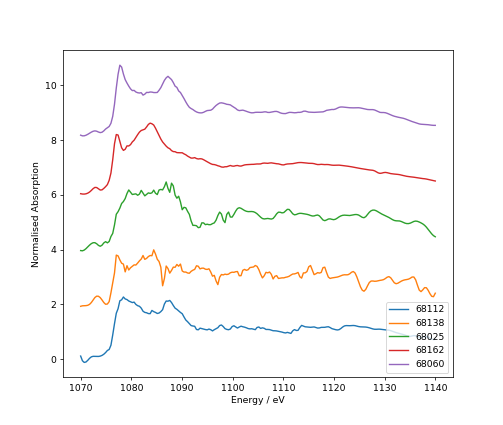

Text(0, 0.5, 'Normalised Absorption')

In [274]:
fig = plt.figure()
for count, dat in enumerate(all_norm_sums):
    datsig = hs.signals.Signal1D(dat.data[None,None,:])
    datsig.axes_manager[-1].scale = dat.axes_manager[0].scale
    datsig.axes_manager[-1].offset = dat.axes_manager[0].offset
    
    
    plt.plot(abs_energy_scale, dat.data+(count*2))
plt.legend(all_norm_sums_key, loc = 4)
plt.xlabel('Energy / eV')
plt.ylabel('Normalised Absorption')


<IPython.core.display.Javascript object>


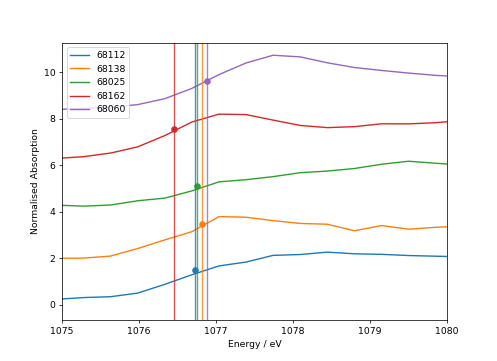

Text(0, 0.5, 'Normalised Absorption')

In [275]:
fig = plt.figure()
vlcs = []
infl_ps = []
for count, dat in enumerate(all_norm_sums):
    datsig = hs.signals.Signal1D(dat.data[None,None,:])
    datsig.axes_manager[-1].scale = dat.axes_manager[0].scale
    datsig.axes_manager[-1].offset = dat.axes_manager[0].offset
    
    infl_ps.append(locate_inflection(datsig, er, abs_energy_scale, (0,0), interp_upscale=150, vis = False))
    
    plt.plot(abs_energy_scale, dat.data+(count*2))
    vlcs.append(fig.properties()['default_bbox_extra_artists'][-8].get_color())
plt.legend(all_norm_sums_key)

for vind, vlc in enumerate(vlcs):
    ssind = int(np.searchsorted(abs_energy_scale, infl_ps[vind]))
    
    hval = np.mean((all_norm_sums[vind].data[ssind], all_norm_sums[vind].data[ssind-1]))
    
    
    plt.axvline(infl_ps[vind], c= vlc, alpha = 0.8)
    plt.scatter(infl_ps[vind], hval+(vind*2))
    
plt.xlim([1075, 1080])

plt.xlabel('Energy / eV')
plt.ylabel('Normalised Absorption')